In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_excel("../data/PM_ML_Data_Final.xlsx")
df.head()

,TestID,WNRD,WNVol,WNNCD,Class
0,1,0.000120,0.012339,0.008525,Similar
1,2,0.000120,0.011953,0.008375,Similar
2,3,0.000196,0.007618,0.004438,Similar
3,4,0.000197,0.007452,0.004424,Similar
4,5,0.000162,0.012785,0.009120,Similar


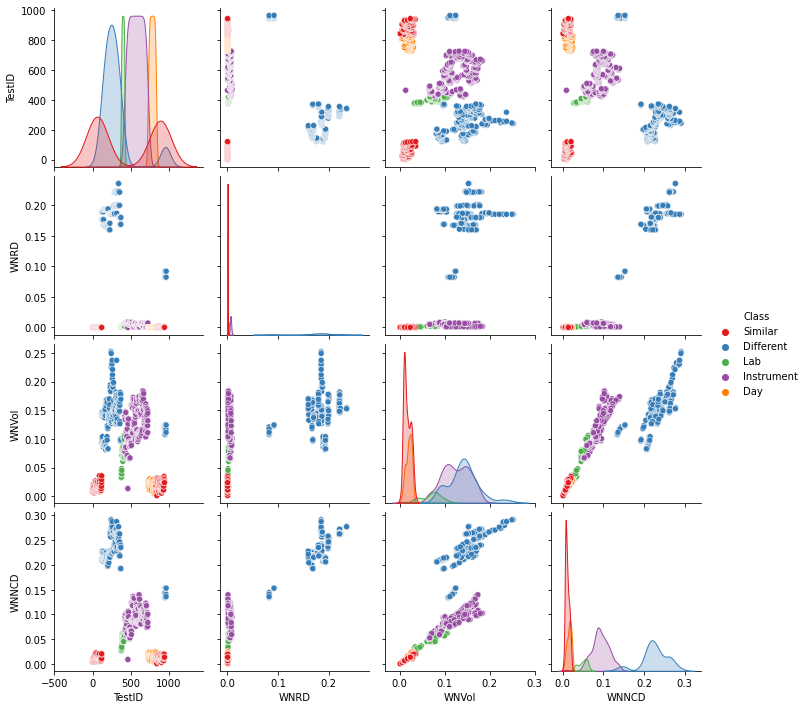

In [8]:
sns.pairplot(df, hue='Class', palette="Set1")

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

## k 값 결정하기

In [17]:
n = np.arange(1, 40)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
for i, k in enumerate(n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

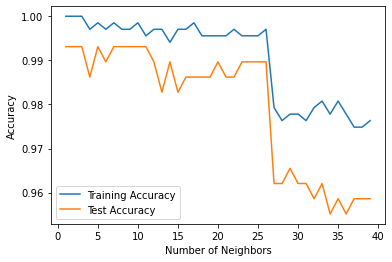

In [25]:
plt.plot(n, train_accuracy, label='Training Accuracy')
plt.plot(n, test_accuracy, label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [26]:
error_rate = []
for i in range(1, 40):
    knn_2 = KNeighborsClassifier(n_neighbors=i)
    knn_2.fit(X_train, y_train)
    pred_i = knn_2.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

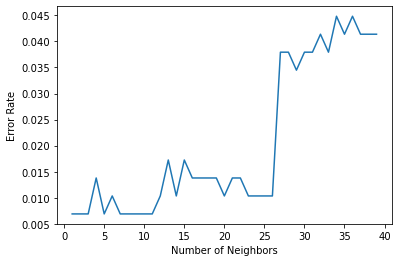

In [27]:
plt.plot(range(1, 40), error_rate)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')